# Regularización

por Mónica Tatiana Gutierrez Ballen

version 1.0, Agosto 2021

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

## Sobreajuste (revisión)

**¿Qué es el sobreajuste?**

- Construir un modelo que se ajuste "demasiado" a los datos de entrenamiento
- Aprender del ruido de los datos, en lugar de sólo de la señal

**¿Cómo se produce el sobreajuste?**

- Evaluar un modelo probándolo con los mismos datos que se utilizaron para entrenarlo
- Crear un modelo "demasiado complejo"

**¿Cuál es el impacto de la sobreadaptación?**

- El modelo funcionará bien en los datos de entrenamiento, pero no se generalizará a los datos fuera de la muestra
- El modelo tendrá un sesgo bajo, pero una varianza alta


## Sobreajuste con modelos lineales

**¿Cuáles son las características generales de los modelos lineales?**

- Baja complejidad del modelo
- Alto sesgo, baja varianza
- No tiende a sobreajustarse

Sin embargo, el **sobreajuste puede ocurrir** con los modelos lineales si se permite que tengan una **varianza alta**. Estas son algunas de las causas más comunes:

### Causa 1: Características irrelevantes

Los modelos lineales pueden sobreajustarse si se incluyen "características irrelevantes", es decir, características que no están relacionadas con la respuesta. ¿Por qué?

Porque aprenderá un coeficiente para cada característica que incluya en el modelo, independientemente de si esa característica tiene la **señal** o el **ruido**.

Esto es especialmente un problema cuando **p (número de características) está cerca de n (número de observaciones)**, porque ese modelo tendrá naturalmente una alta varianza.


### Causa 2: Características correlacionadas

Los modelos lineales pueden sobreajustarse si las características incluidas están muy correlacionadas entre sí. ¿Por qué?

De la [documentación de scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares):

> "...las estimaciones de los coeficientes de los mínimos cuadrados ordinarios se basan en la independencia de los términos del modelo. Cuando los términos están correlacionados y las columnas de la matriz de diseño X tienen una dependencia lineal aproximada, la matriz de diseño se vuelve casi singular y, como resultado, la estimación por mínimos cuadrados se vuelve muy sensible a los errores aleatorios en la respuesta observada, produciendo una gran varianza."

### Causa 3: Complejidad del modelo

El sobreajuste también es causado por la complejidad de la función predictiva formada por el modelo para predecir el resultado. Cuanto más complejo sea el modelo, más tenderá a sobreajustarse a los datos. Por lo tanto, el sesgo será bajo y la varianza será mayor.

### Causa 4: Tamaño reducido de los datos de entrenamiento

El sobreajuste es causado por el tamaño de los datos. Sabemos que cuantos más datos, más aprenderá el modelo, por lo tanto, tratamos de dar mejores predicciones. Si los datos de entrenamiento son bajos, entonces el modelo no podrá explorar todos los escenarios o posibilidades. Esto hace que el modelo solo se ajuste a los datos dados, pero cuando lo introducimos con datos no vistos, la precisión de la predicción disminuirá y también aumentará la varianza.

### Causa 5: Coeficientes grandes

Los modelos lineales pueden sobreajustarse si los coeficientes (tras la normalización de las características) son demasiado grandes. ¿Por qué?

Porque cuanto **más grande** sea el valor absoluto del coeficiente, más **poder** tiene para cambiar la respuesta predicha, lo que da lugar a una mayor varianza.

## Regularización de modelos lineales

- La regularización es un método para "restringir" o "regularizar" el **tamaño de los coeficientes**, "reduciéndolos" hacia cero.
- Reduce la varianza del modelo y, por lo tanto, **minimiza el sobreajuste**.
- Si el modelo es demasiado complejo, tiende a reducir la varianza más de lo que aumenta el sesgo, lo que da lugar a un modelo que es **más probable que generalice**.

Nuestro objetivo es localizar la **complejidad óptima del modelo**, por lo que la regularización es útil cuando creemos que nuestro modelo es demasiado complejo.

![Bias-variance tradeoff](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/bias_variance.png)

### ¿Cómo funciona la regularización?

Para un modelo de regresión lineal normal, estimamos los coeficientes utilizando el criterio de mínimos cuadrados, que **minimiza la suma de cuadrados residual (RSS):**

![Estimating coefficients](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/estimating_coefficients.png)

Para un modelo de regresión lineal regularizado, se **minimiza la suma de RSS y un "término de penalización "** que penaliza el tamaño de los coeficientes.

**La regresión de Ridge** (o "regularización L2") minimiza: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

**La regresión de Lasso** (o "regularización L1") minimiza: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

- $p$ es el **número de características**
- $\beta_j$ es un **coeficiente del modelo**
- $\alpha$ es un **parámetro de ajuste:**
    - Una pequeña $\alpha$ no impone ninguna penalización en el tamaño del coeficiente, y es equivalente a un modelo de regresión lineal normal.
    - Aumentar $\alpha$ penaliza los coeficientes y, por tanto, los reduce.

### Diagramas de Lasso y de Ridge

Un alfa mayor (hacia la izquierda de cada diagrama) da lugar a una mayor regularización:

- **La regresión de Lasso** encoge los coeficientes hasta cero, eliminándolos así del modelo
- **La regresión de Ridge** encoge los coeficientes hacia cero, pero rara vez llegan a cero

Código fuente de los diagramas: [Regresión Lasso](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html) y [regresión Ridge](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)

![Lasso and Ridge Path Diagrams](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/lasso_ridge_path.png)

### Consejos para aplicar la regularización

**¿Deben normalizarse las características?**

- Sí, porque de lo contrario, las características serían penalizadas simplemente por su escala.
- Además, estandarizar evita penalizar el intercepto, lo que no tendría sentido intuitivo.

**¿Cómo elegir entre la regresión Lasso y la regresión Ridge?**

- La regresión Lasso es preferible si creemos que muchas características son irrelevantes o si preferimos un modelo disperso.
- Si el rendimiento del modelo es su principal preocupación, es mejor probar ambos.
- La regresión de ElasticNet es una combinación de la regresión lasso y la regresión ridge.

### Visualización de la regularización

A continuación se muestra una visualización de lo que ocurre cuando se aplica la regularización. La idea general es que usted está **restringiendo los valores permitidos de sus coeficientes** a una cierta "región". **Dentro de esa región**, quieres encontrar los coeficientes que dan como resultado el mejor modelo.

![Lasso and Ridge Coefficient Plots](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/lasso_ridge_coefficients.png)

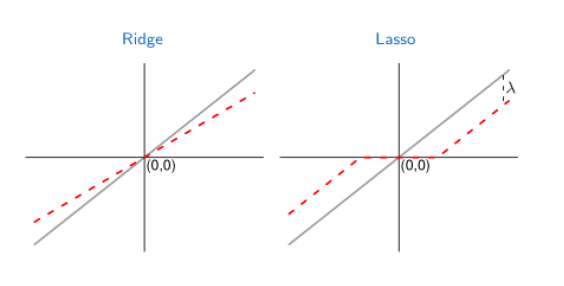

En este diagrama:

- Estamos ajustando un modelo de regresión lineal con **dos características**, $x_1$ y $x_2$.
- $\hat\beta$ representa el conjunto de dos coeficientes, $\beta_1$ y $\beta_2$, que minimizan el RSS para el **modelo no regularizado**.
- La regularización restringe las posiciones permitidas de $\hat\beta$ a la **región de restricción azul:**
    - Para Lasso, esta región es un **diamante** porque restringe el valor absoluto de los coeficientes.
    - Para Ridge, esta región es un **círculo** porque restringe el cuadrado de los coeficientes.
- El **tamaño de la región azul** está determinado por $\alpha$, con un $\alpha$ más pequeño que resulta en una región más grande:
    - Cuando $\alpha$ es cero, la región azul es infinitamente grande, y por lo tanto los tamaños de los coeficientes no están limitados.
    - Cuando $\alpha$ aumenta, la región azul es cada vez más pequeña.

En este caso, $\hat\beta$ no está** dentro de la región azul de la restricción. Por lo tanto, tenemos que **mover $\hat\beta$ hasta que se cruza con la región azul**, mientras **aumentar el RSS lo menos posible.**

De la página 222 de [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/):

> Las elipses que se centran alrededor de $\hat\beta$ representan **regiones de RSS constante**. En otras palabras, todos los puntos de una elipse determinada comparten un valor común de la RSS. A medida que las elipses se alejan de las estimaciones del coeficiente de mínimos cuadrados, el RSS aumenta. Las ecuaciones (6.8) y (6.9) indican que las estimaciones de los coeficientes del Lasso y de la regresión de Ridge vienen dadas por el **primer punto en el que una elipse entra en contacto con la región de restricción**.

> Dado que la **regresión de Ridge** tiene una restricción circular sin puntos agudos, esta intersección no se producirá generalmente en un eje, por lo que las estimaciones del coeficiente de regresión de cresta serán exclusivamente distintas de cero. Sin embargo, la restricción **lasso** tiene esquinas en cada uno de los ejes, por lo que la elipse a menudo intersectará la región de la restricción en un eje. Cuando esto ocurre, uno de los coeficientes será igual a cero. En dimensiones superiores, muchos de los coeficientes estimados pueden ser iguales a cero simultáneamente. En la figura 6.7, la intersección se produce en $\beta_1 = 0$, por lo que el modelo resultante sólo incluirá $\beta_2$.

## Regresión regularizada en scikit-learn

- Conjunto de datos de Comunidades y Delitos del Repositorio de Aprendizaje Automático de la UCI: [datos](http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data), [diccionario de datos](http://archive.ics.uci.edu/ml/datasets/Communities+y+Crimen)
- **Objetivo:** Predecir la tasa de delitos violentos para una comunidad dados los datos socioeconómicos y de aplicación de la ley.

### Cargar y preparar el conjunto de datos sobre delincuencia

In [1]:
# read in the dataset
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

url = 'https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/communities.data'
crime = pd.read_csv(url, header=None, na_values=['?'])
crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [2]:
# examine the response variable
crime[127].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: 127, dtype: float64

In [3]:
# remove categorical features
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)

In [4]:
# remove rows with any missing values
crime.dropna(inplace=True)

In [5]:
# check the shape
crime.shape

(319, 123)

In [6]:
# define X and y
X = crime.drop(127, axis=1)
y = crime[127]

In [7]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Regresión lineal

In [8]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [9]:
# examine the coefficients
print(linreg.coef_)

[ -3.66188167   0.69812446  -0.26195547  -0.28527003  -0.16474084
   0.24697233  -1.09290051  -0.5968578    1.11200239  -0.72196893
   4.27346598  -0.22804027   0.80487577  -0.25793473  -0.26345802
  -1.04616958   0.6077842    0.77355256   0.0596468    0.69021592
   0.02167594  -0.48780295  -0.5188584    0.13947881  -0.12441794
   0.31500382  -0.15263374  -0.96500393   1.17142163  -0.03085467
  -0.92908555   0.12465459   0.19810451   0.73080482  -0.17733729
   0.08329276   0.3460456    0.50183734   1.57062958  -0.41347881
   1.39350802  -3.49428114   0.70957782  -0.83214135  -1.39984927
   1.0248284    0.21385501  -0.61893732   0.52895449   0.07982949
   0.05936886  -0.16858267   0.73126405  -1.39635208   0.2385077
   0.55062144  -0.56144787   0.61898976   2.55517024  -3.71769599
   0.70919193   0.38204144   0.82375284  -1.67703547  -1.7315045
   0.99012017  -0.5727457   -1.45877295   0.86803214   0.51595998
   0.03144532   0.20186979   0.09652919   2.13034099  -0.06953744
   0.0462477

In [10]:
# make predictions
y_pred = linreg.predict(X_test)

In [11]:
# calculate RMSE
from sklearn import metrics
import numpy as np
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  0.2338136764948696


Estandarizar datos

In [12]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Regresión Ridge

- Documentación [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- **alpha:** debe ser positivo, aumentar para una mayor regularización
- **normalizar:** escala las características

In [13]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.2664535168212703


In [14]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.23783827852924927


In [15]:
# examine the coefficients
print(ridgereg.coef_)

[-0.11530516  0.08796533 -0.08147485 -0.04599357 -0.03684037  0.03553011
 -0.10787286 -0.06630354  0.11911534 -0.06682613  0.22598012 -0.01171634
  0.1084221  -0.05156257 -0.01636646 -0.16037465  0.04508398  0.14656533
  0.03144114  0.10938905 -0.0644292  -0.02589341 -0.04901674  0.01748539
 -0.01380324  0.03425351 -0.02296475 -0.24202339  0.20405013 -0.01542137
 -0.14815687  0.04451414  0.04616765  0.10632022 -0.03627444  0.01385309
  0.07641109  0.04877988  0.12820845 -0.05713528  0.02333009 -0.24859995
  0.13425394 -0.13376289 -0.26771755  0.19326962  0.0139759  -0.07982851
  0.08300411  0.02278776  0.03147842 -0.03683044  0.08182429 -0.19156193
  0.10370994  0.01938236 -0.05666595  0.15981452  0.16364381 -0.44803483
  0.10562352  0.07949012  0.03348336 -0.16013174 -0.16965958  0.06641771
 -0.11409004 -0.12855536  0.12487214  0.08265319  0.01420998  0.06349145
  0.01961172  0.19203896 -0.01660702  0.01382544  0.01738067  0.00491125
 -0.03377675 -0.08173202 -0.02371831  0.00385974 -0

In [16]:
linreg.coef_ - ridgereg.coef_

array([ -3.54657651,   0.61015913,  -0.18048062,  -0.23927645,
        -0.12790047,   0.21144222,  -0.98502765,  -0.53055426,
         0.99288705,  -0.6551428 ,   4.04748586,  -0.21632392,
         0.69645367,  -0.20637216,  -0.24709157,  -0.88579493,
         0.56270022,   0.62698723,   0.02820566,   0.58082687,
         0.08610514,  -0.46190954,  -0.46984167,   0.12199342,
        -0.11061471,   0.28075031,  -0.12966899,  -0.72298054,
         0.9673715 ,  -0.0154333 ,  -0.78092868,   0.08014045,
         0.15193685,   0.6244846 ,  -0.14106286,   0.06943967,
         0.26963451,   0.45305745,   1.44242113,  -0.35634352,
         1.37017793,  -3.24568119,   0.57532388,  -0.69837847,
        -1.13213172,   0.83155878,   0.19987911,  -0.53910882,
         0.44595038,   0.05704173,   0.02789044,  -0.13175222,
         0.64943976,  -1.20479015,   0.13479776,   0.53123908,
        -0.50478192,   0.45917524,   2.39152643,  -3.26966116,
         0.60356841,   0.30255132,   0.79026948,  -1.51

- [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html): regresión ridge con validación cruzada incorporada del parámetro alfa
- **alphas:** matriz de valores alfa para probar

In [ ]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 4)
alpha_range

array([   0.01,    0.1 ,    1.  ,   10.  ,  100.  , 1000.  ])

In [ ]:
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

ridgeregcv = RidgeCV(alphas=alpha_range, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

100.0

In [ ]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.16585167514151905


### Regresión de Lasso

- Documentación [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- **alpha:** debe ser positivo, aumentar para una mayor regularización
- **normalizar:** escala las características (sin usar StandardScaler)

In [ ]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.          0.00131455  0.         -0.         -0.          0.01806743
 -0.00247247 -0.         -0.          0.          0.         -0.00672995
  0.         -0.01924927 -0.01001819 -0.10896024  0.          0.04717453
 -0.00580568  0.03974207 -0.         -0.         -0.01811139  0.
  0.          0.02518759  0.00235744 -0.07667618  0.03459149 -0.01600829
 -0.07929216  0.          0.02123365  0.         -0.03406633  0.01512109
  0.03890292  0.          0.         -0.         -0.02148412 -0.
  0.03446889 -0.         -0.0850324   0.         -0.         -0.01576336
  0.02675169 -0.00046801  0.06292037 -0.01390291  0.01024566 -0.04904135
  0.03545682  0.         -0.         -0.         -0.         -0.
 -0.          0.03023815 -0.         -0.          0.          0.
 -0.0609003   0.          0.          0.05911681  0.01540538  0.03129111
  0.01562312  0.02200693 -0.00375454  0.003306    0.          0.
 -0.01188481 -0.0255619  -0.00917315 -0.         -0.09766515  0.
 -0.          0.12542851 -

In [ ]:
# predict method uses the best alpha value
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.17509971067282468


In [ ]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.          0.          0.0065211  -0.04961822  0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.         -0.00038089 -0.         -0.03508233  0.          0.
 -0.         -0.         -0.          0.         -0.         -0.00163238
  0.          0.00664746  0.         -0.          0.         -0.
 -0.         -0.          0.01846673 -0.00100451 -0.02000652  0.
  0.          0.          0.01521239  0.          0.          0.
  0.         -0.02198551 -0.06391534 -0.         -0.         -0.
 -0.          0.          0.01233622  0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.          0.          0.          0.01310815 -0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.0055428  -0.
 -0.         -0.          0.         -0.         -0.00423636  0.
  0.03103817  0. 

In [ ]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.16384114048308449


- [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html): regresión lasso con validación cruzada incorporada del parámetro alfa
- **n_alphas:** número de valores alfa (elegidos automáticamente) para probar

In [ ]:
# select the best alpha with LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, random_state=1,cv=5)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

0.019012303546697588

In [ ]:
# examine the coefficients
print(lassoregcv.coef_)

[ 0.          0.          0.         -0.07429192  0.          0.
  0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.02742997  0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.01224945 -0.
  0.         -0.          0.00023627 -0.         -0.00777567  0.
  0.         -0.          0.0125149   0.          0.          0.00565275
  0.         -0.02633638 -0.06604921 -0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.00440168 -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.03266568  0. 

In [ ]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.16130704036175536


## Parte 5: Clasificación regularizada en scikit-learn

- Conjunto de datos de vino del repositorio de aprendizaje automático de la UCI: [datos](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data), [diccionario de datos](http://archive.ics.uci.edu/ml/datasets/Wine)
- **Objetivo:** Predecir el origen del vino utilizando el análisis químico

### Cargar y preparar el conjunto de datos del vino

In [ ]:
# read in the dataset
url = 'https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/wine.data'
wine = pd.read_csv(url, header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# examine the response variable
wine[0].value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [ ]:
# define X and y
X = wine.drop(0, axis=1)
y = wine[0]

In [ ]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Regresión logística (no regularizada)

In [ ]:
# build a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9,solver='liblinear',multi_class='auto')
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, solver='liblinear')

In [ ]:
# examine the coefficients
print(logreg.coef_)

[[ -3.79950938   4.28588171  13.38104098  -2.54049389   0.10259403
   -4.46735202   9.36030378   2.61786023 -10.20265806  -2.08190627
   -1.62407151   6.29633261   0.0617279 ]
 [  6.45587348  -6.52042039 -20.28302485   2.04493754  -0.00828054
    3.27430767   5.6546154    3.18610896   6.68831862  -9.30858364
    4.04659496  -8.64965122  -0.05764956]
 [ -0.97020606   2.08269159   0.94152832   0.2380262   -0.00249589
   -0.98098267  -6.5489069   -0.48330233  -2.6588818    2.57458134
   -1.30417239  -2.34300422   0.00948519]]


In [ ]:
# generate predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)
print(y_pred_prob)

[[0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.99999991 0.         0.00000009]
 [0.00000006 0.99999982 0.00000012]
 [0.99973087 0.         0.00026913]
 [0.         0.00000005 0.99999995]
 [0.99984185 0.00000132 0.00015683]
 [0.99999972 0.         0.00000028]
 [0.         0.         1.        ]
 [0.         0.99999701 0.00000299]
 [0.99996767 0.         0.00003233]
 [0.99332094 0.00667882 0.00000025]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.00000003 0.99999997 0.        ]
 [0.         0.99999996 0.00000004]
 [0.         0.4733096  0.5266904 ]
 [0.9999929  0.00000707 0.00000003]
 [0.         0.99999993 0.00000007]
 [0.99977836 0.         0.00022164]
 [0.99999973 0.         0.00000027]
 [0.         1.         0.        ]
 [0.00000002 0.96952242 0.03047756]
 [0.00018131 0.99981869 0.        ]
 [0.99999688 0.00000312 0.        ]
 [0.         0.         1.        ]
 [0.99999999 0.00000001 0.        ]
 [0.99999985 0.         0.00

In [ ]:
# calculate log loss
print(metrics.log_loss(y_test, y_pred_prob))

0.4004250390106464


### Regresión logística (regularizada)

- Documentación [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **C:** debe ser positivo, disminuir para más regularización
- **penalización:** l1 (lasso) o l2 (ridge)

In [ ]:
# standardize X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = X_train.astype(float)
X_test = X_test.astype(float)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# try C=0.1 with L1 penalty
logreg = LogisticRegression(C=0.1, penalty='l1',solver='liblinear',multi_class='auto')
logreg.fit(X_train_scaled, y_train)
print(logreg.coef_)

[[ 0.21039911  0.          0.          0.          0.          0.
   0.48833251  0.          0.          0.          0.          0.15227297
   1.47737959]
 [-0.65721804 -0.05613938 -0.1139677   0.          0.          0.
   0.          0.          0.         -0.73813893  0.2441465   0.
  -0.63396401]
 [ 0.          0.          0.          0.          0.          0.
  -0.84209357  0.          0.          0.61543237 -0.49020984 -0.3044923
   0.        ]]


In [ ]:
# generate predicted probabilities and calculate log loss
y_pred_prob = logreg.predict_proba(X_test_scaled)
print(metrics.log_loss(y_test, y_pred_prob))

0.362244287287485


In [ ]:
# try C=0.1 with L2 penalty
logreg = LogisticRegression(C=0.1, penalty='l2',multi_class='auto',solver='liblinear')
logreg.fit(X_train_scaled, y_train)
print(logreg.coef_)

[[ 0.59163934  0.06886667  0.33592964 -0.49616684  0.111539    0.21570086
   0.40524509 -0.15526139 -0.02534651  0.05399014  0.14877346  0.42327938
   0.89815007]
 [-0.73545676 -0.32942948 -0.47995296  0.294866   -0.1500246   0.04264373
   0.14500586  0.07250763  0.17409795 -0.70726652  0.4128986   0.09997212
  -0.81284365]
 [ 0.20136567  0.30989025  0.15977925  0.18867218  0.04204443 -0.27108109
  -0.55886639  0.07486943 -0.17471153  0.68266464 -0.52385748 -0.49566967
  -0.02565631]]


In [ ]:
# generate predicted probabilities and calculate log loss
y_pred_prob = logreg.predict_proba(X_test_scaled)
print(metrics.log_loss(y_test, y_pred_prob))

0.2445883245394477


## [Comparación Ridge y Lasso](https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html)

* La principal diferencia práctica entre lasso y ridge es que el primero consigue que algunos coeficientes sean exactamente cero, por lo que realiza selección de predictores, mientras que el segundo no llega a excluir ninguno. Esto supone una ventaja notable de lasso en escenarios donde no todos los predictores son importantes para el modelo y se desea que los menos influyentes queden excluidos.

* Cuando existen predictores altamente correlacionados (linealmente), ridge reduce la influencia de todos ellos a la vez y de forma proporcional, mientras que lasso tiende a seleccionar uno de ellos, dándole todo el peso y excluyendo al resto. En presencia de correlaciones, esta selección varía mucho con pequeñas perturbaciones (cambios en los datos de entrenamiento), por lo que, las soluciones de lasso, son muy inestables si los predictores están altamente correlacionados.

* Para conseguir un equilibrio óptimo entre estas dos propiedades, se puede emplear lo que se conoce como penalización *Elastic Net*, que combina ambas estrategias.



## Comparación de los modelos lineales regularizados con los modelos lineales no regularizados

**Ventajas de los modelos lineales regularizados:**

- Mejor rendimiento
- La regularización L1 (Lasso) realiza una selección automática de características, mientras que la regularización L2 (Ridge) no permite seleccionar variables.
- Útil para problemas de alta dimensión (p > n)

**Desventajas de los modelos lineales regularizados**

- Se requiere un ajuste
- Se recomienda escalar las características
- Menos interpretable (debido al escalado de características)